<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KMeans</a></span><ul class="toc-item"><li><span><a href="#Generating-two-clusters" data-toc-modified-id="Generating-two-clusters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generating two clusters</a></span></li><li><span><a href="#Clustering-data" data-toc-modified-id="Clustering-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clustering data</a></span></li><li><span><a href="#Iterations" data-toc-modified-id="Iterations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Iterations</a></span></li></ul></li></ul></div>

# KMeans

In [1]:
import numpy as np

class KMeans:
        
    def __init__(self, n_clusters=2):
        self.K = n_clusters
    
    def fit(self, X, max_iter=10):
        assert X.ndim == 2, X.shape
        
        K = self.K
        ndata = X.shape[0]
        nfeatures=X.shape[1]
        
        # initial center
        center_examples=np.random.choice(ndata, self.K)
        center=X[center_examples]
        assert center.shape == (K,nfeatures)

        
        self.cs=[]
        self.ls=[]
        
        last_labels=None
        for it in range(max_iter):
            labels=self.get_labels(center,X)

            if (it > 0) and np.array_equal(last_labels, labels):
                break

            # save data
            self.center_=center
            self.labels_=labels
            self.cs.append(center)
            self.ls.append(labels)
            
            # update center
            center=np.zeros(shape=(K,nfeatures),dtype=X.dtype)
            for k in range(K):
                center[k,:]=np.mean(X[labels==k],axis=0)
                
            last_labels=labels
                
    def predict(self, X):
        return self.get_labels(self.center_, X)
    
    def get_labels(self, center, X):
        K = self.K
        ndata = X.shape[0]
        nfeatures=X.shape[1]
        
        center3=center.reshape(1,K,nfeatures)
        X3=X.reshape(ndata,1,nfeatures)
        
        #[ndata, K, nfeatures]
        diff=X3-center3
        assert diff.shape == (ndata, K, nfeatures)

        #distance square [ndata, K]
        dist=np.sum(np.square(diff), axis=2)
        assert dist.shape == (ndata, K)

        #labels [ndata]
        labels=np.argmin(dist,axis=1)
        assert labels.shape == (ndata,), labels.shape
        return labels
    


## Generating two clusters 

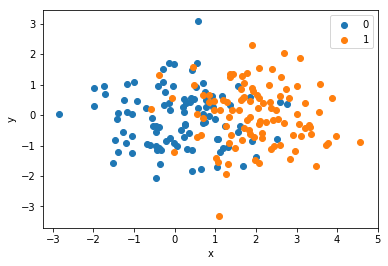

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(21)
N=100
X1=np.random.randn(N)
Y1=np.random.randn(N)
X2=np.random.randn(N)+2
Y2=np.random.randn(N)

X=np.hstack((X1,X2))
Y=np.hstack((Y1,Y2))
XY=np.c_[X,Y]

plt.figure()
plt.scatter(X1,Y1,label="0")
plt.scatter(X2,Y2,label="1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Clustering data

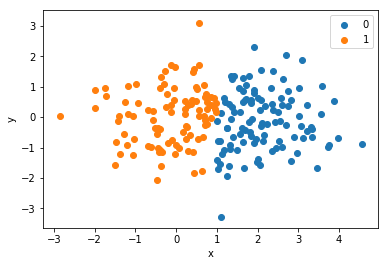

In [3]:
kmeans=KMeans()
kmeans.fit(XY)
XY1_=XY[kmeans.labels_==0]
XY2_=XY[kmeans.labels_==1]


plt.figure()
plt.scatter(XY1_[:,0], XY1_[:,1],label="0")
plt.scatter(XY2_[:,0], XY2_[:,1],label="1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Iterations

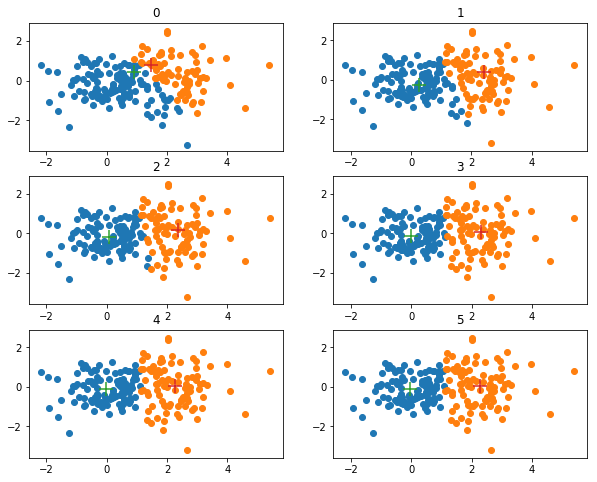

In [4]:
np.random.seed(13)
N=100
X1=np.random.randn(N)
Y1=np.random.randn(N)
X2=np.random.randn(N)+2
Y2=np.random.randn(N)

X=np.hstack((X1,X2))
Y=np.hstack((Y1,Y2))
XY=np.c_[X,Y]

kmeans=KMeans()
kmeans.fit(XY,max_iter=10)

M=3
N=2
f,ax=plt.subplots(M,N,figsize=(10,8))
for i in range(M):
    for j in range(N):
        fig_iter=i*N+j
        iter=min(fig_iter,len(kmeans.ls)-1)        
        XY1_=XY[kmeans.ls[iter]==0]
        XY2_=XY[kmeans.ls[iter]==1]
        ax[i][j].scatter(XY1_[:,0], XY1_[:,1],label="0")
        ax[i][j].scatter(XY2_[:,0], XY2_[:,1],label="1")
        ax[i][j].scatter(kmeans.cs[iter][0:1,0], kmeans.cs[iter][0:1,1],marker='+',s=200)
        ax[i][j].scatter(kmeans.cs[iter][1:2,0], kmeans.cs[iter][1:2,1],marker='+',s=200)
        ax[i][j].set_title(str(fig_iter))
    
    